# Glacier Bay AIS tracks can serve as a guide to annotators in SPLAT

Load and collate AIS data with acoustic data. Use context to delimit expected audible bounds.

---

This notebook uses geoprocessing libraries which can result in version conflicts. It is highly recommended to create a fresh virtual environment: install `geopandas` first, then build up the necessary dependancies from there. *See import statements in `GLBA-vesselAcoustics\AIS_utilities.py` for full list of required libraries.*

---

It also uses a few specialized NPS libraries (`iyore`, `soundDB`). For the latter it's easiest to get the code directly from GitHub and import the necessary parser (`nvspl`) directly from the module. 

---

#### <font color="magenta"> TO DO </font>: 

- evaluate error due to propagation time

In [ ]:
# %reset

In [1]:
# # geoprocessing libraries
# import fiona
# from fiona.crs import from_epsg
# import pyproj
# import geopandas as gpd
# from shapely.ops import transform
# from shapely.geometry import mapping, Point, Polygon
# import rasterio
# import rasterio.mask
# from rasterio.plot import show

# # some 'everyday' libraries
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd
# import numpy as np
# from functools import partial
# import datetime as dt
# import pytz
# import os
# import glob

import sys

# specialized NPS libraries
import iyore

sys.path.append(r"C:\Users\DBetchkal\PythonScripts\3 GITHUB REPOSITORIES\soundDB")
from soundDB import nvspl, srcid

sys.path.append(r"C:\Users\DBetchkal\PythonScripts\3 GITHUB REPOSITORIES\GLBA-vesselAcoustics")
from AIS_utilities import *


In [9]:
# which drive are the acoustic data on?
ds = iyore.Dataset(r"E:")

for entry in ds.dataDir(unit="GLBA"):
    
    if(int(entry.year) > 2011):
        print(entry.unit + entry.site + entry.year)

GLBABARTC2020
GLBAHUNT2020
GLBAHUTCH2020
GLBAREID2020
GLBARENDU2020
GLBABARTC2021
GLBABEARD2021
GLBAMCLEOD2021
GLBARENDU2021


# This cell does quite a bit:

### (1) Load GPS data for a given deployment and detection distance

### (2) Plot the overlapping points within park context

### (3) Save a SRCID file that will help guide annotation work

Now compiling AIS points within 10 kilometers of GLBARENDU2021:

	Circular mask created around site.
	Loading AIS points into memory. This may take a while...

		122 .csv files will be processed...
		Dates have been stripped from the files...
		Files have been concatenated into a `pd.DataFrame` object...
		1090 MHz ADS-B data have been dropped...
		Raw `gpd.GeoDataFrame` object has been created...
		Finished creating GeoDataFrame!

	AIS points have been spatially filtered to within circular mask.

GLBARENDU2021: 6528944, 406040 - UTM zone 8
	microphone height 4.53 feet. 


	Record begins 2021-05-11 and ends 2021-09-26 

	Full spatio-temporal filtering has been completed.


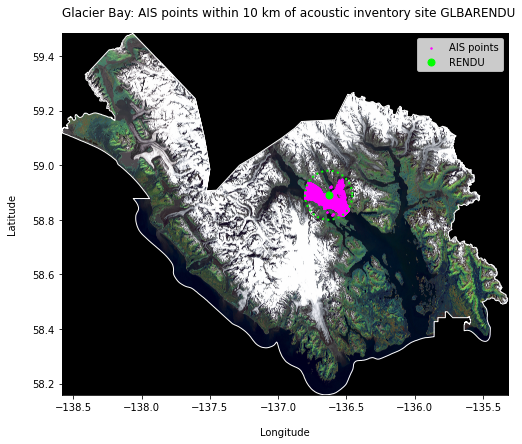

	Attempting to create SRCID.txt guide for annotation.
================ now working on MMSI 211808800 ================ 

MMSI 211808800 event #1
this will be srcID 3.114
Alaska [enter/exit]: 2021-07-25 12:34:18 / 2021-07-25 12:45:18
Vehicle within radius for 0 days 00:11:00

MMSI 211808800 event #2
this will be srcID 3.114
Alaska [enter/exit]: 2021-07-25 13:01:25 / 2021-07-25 13:37:41
Vehicle within radius for 0 days 00:36:16

MMSI 211808800 event #3
this will be srcID 3.114
Alaska [enter/exit]: 2021-07-27 10:14:39 / 2021-07-27 10:25:13
Vehicle within radius for 0 days 00:10:34

================ now working on MMSI 232002990 ================ 

MMSI 232002990 event #1
this will be srcID 3.191
Alaska [enter/exit]: 2021-07-29 07:54:05 / 2021-07-29 08:19:28
Vehicle within radius for 0 days 00:25:23

MMSI 232002990 event #2
this will be srcID 3.191
Alaska [enter/exit]: 2021-07-29 12:16:34 / 2021-07-29 12:42:44
Vehicle within radius for 0 days 00:26:10

MMSI 232002990 event #3
this will be sr

Alaska [enter/exit]: 2021-08-09 05:49:06 / 2021-08-09 06:16:15
Vehicle within radius for 0 days 00:27:09

MMSI 338043017 event #23
this will be srcID 1.198
MMSI 338043017 event #24
this will be srcID 1.198
Alaska [enter/exit]: 2021-08-10 08:16:54 / 2021-08-10 08:28:50
Vehicle within radius for 0 days 00:11:56

MMSI 338043017 event #25
this will be srcID 1.198
Alaska [enter/exit]: 2021-08-10 08:47:00 / 2021-08-10 10:07:40
Vehicle within radius for 0 days 01:20:40

================ now working on MMSI 338101401 ================ 

MMSI 338101401 event #1
this will be srcID 2.859
================ now working on MMSI 338144818 ================ 

MMSI 338144818 event #1
this will be srcID 2.813
MMSI 338144818 event #2
this will be srcID 2.813
Alaska [enter/exit]: 2021-06-28 09:14:45 / 2021-06-28 09:15:45
Vehicle within radius for 0 days 00:01:00

================ now working on MMSI 338166495 ================ 

MMSI 338166495 event #1
this will be srcID 0.182
================ now working on 

MMSI 366339000 event #1
this will be srcID 2.596
Alaska [enter/exit]: 2021-05-31 16:19:59 / 2021-05-31 17:25:06
Vehicle within radius for 0 days 01:05:07

MMSI 366339000 event #2
this will be srcID 2.596
Alaska [enter/exit]: 2021-06-01 18:06:28 / 2021-06-01 19:49:49
Vehicle within radius for 0 days 01:43:21

MMSI 366339000 event #3
this will be srcID 2.596
Alaska [enter/exit]: 2021-06-13 22:03:46 / 2021-06-13 23:11:15
Vehicle within radius for 0 days 01:07:29

MMSI 366339000 event #4
this will be srcID 2.596
Alaska [enter/exit]: 2021-06-14 13:17:51 / 2021-06-14 14:31:09
Vehicle within radius for 0 days 01:13:18

MMSI 366339000 event #5
this will be srcID 2.596
Alaska [enter/exit]: 2021-06-24 03:16:04 / 2021-06-24 04:32:49
Vehicle within radius for 0 days 01:16:45

MMSI 366339000 event #6
this will be srcID 2.596
Alaska [enter/exit]: 2021-06-24 13:18:47 / 2021-06-24 14:22:25
Vehicle within radius for 0 days 01:03:38

MMSI 366339000 event #7
this will be srcID 2.596
Alaska [enter/exit]: 

MMSI 366945000 event #11
this will be srcID 2.575
Alaska [enter/exit]: 2021-07-15 12:26:15 / 2021-07-15 13:50:34
Vehicle within radius for 0 days 01:24:19

MMSI 366945000 event #12
this will be srcID 2.575
Alaska [enter/exit]: 2021-07-19 06:19:31 / 2021-07-19 06:41:37
Vehicle within radius for 0 days 00:22:06

MMSI 366945000 event #13
this will be srcID 2.575
Alaska [enter/exit]: 2021-07-19 06:56:50 / 2021-07-19 07:02:29
Vehicle within radius for 0 days 00:05:39

MMSI 366945000 event #14
this will be srcID 2.575
Alaska [enter/exit]: 2021-07-19 11:30:00 / 2021-07-19 13:42:17
Vehicle within radius for 0 days 02:12:17

MMSI 366945000 event #15
this will be srcID 2.575
Alaska [enter/exit]: 2021-07-27 05:13:34 / 2021-07-27 06:21:23
Vehicle within radius for 0 days 01:07:49

MMSI 366945000 event #16
this will be srcID 2.575
Alaska [enter/exit]: 2021-07-27 13:11:50 / 2021-07-27 14:29:59
Vehicle within radius for 0 days 01:18:09

MMSI 366945000 event #17
this will be srcID 2.575
Alaska [enter/

Alaska [enter/exit]: 2021-07-25 10:39:18 / 2021-07-25 11:08:42
Vehicle within radius for 0 days 00:29:24

MMSI 367117530 event #13
this will be srcID 1.278
Alaska [enter/exit]: 2021-07-25 12:47:51 / 2021-07-25 13:11:19
Vehicle within radius for 0 days 00:23:28

MMSI 367117530 event #14
this will be srcID 1.278
Alaska [enter/exit]: 2021-07-26 10:17:04 / 2021-07-26 10:51:55
Vehicle within radius for 0 days 00:34:51

MMSI 367117530 event #15
this will be srcID 1.278
Alaska [enter/exit]: 2021-07-26 12:52:36 / 2021-07-26 13:17:27
Vehicle within radius for 0 days 00:24:51

MMSI 367117530 event #16
this will be srcID 1.278
Alaska [enter/exit]: 2021-07-27 10:25:11 / 2021-07-27 10:26:24
Vehicle within radius for 0 days 00:01:13

MMSI 367117530 event #17
this will be srcID 1.278
Alaska [enter/exit]: 2021-07-27 10:44:41 / 2021-07-27 11:03:24
Vehicle within radius for 0 days 00:18:43

MMSI 367117530 event #18
this will be srcID 1.278
Alaska [enter/exit]: 2021-07-27 13:30:21 / 2021-07-27 13:53:15
V

MMSI 367478830 event #1
this will be srcID 0.750
Alaska [enter/exit]: 2021-06-13 18:11:02 / 2021-06-13 18:14:43
Vehicle within radius for 0 days 00:03:41

MMSI 367478830 event #2
this will be srcID 0.750
Alaska [enter/exit]: 2021-06-13 18:33:04 / 2021-06-13 19:10:17
Vehicle within radius for 0 days 00:37:13

MMSI 367478830 event #3
this will be srcID 0.750
Alaska [enter/exit]: 2021-06-19 16:33:00 / 2021-06-19 17:41:36
Vehicle within radius for 0 days 01:08:36

MMSI 367478830 event #4
this will be srcID 0.750
MMSI 367478830 event #5
this will be srcID 0.750
MMSI 367478830 event #6
this will be srcID 0.750
Alaska [enter/exit]: 2021-06-20 02:35:27 / 2021-06-20 02:50:33
Vehicle within radius for 0 days 00:15:06

MMSI 367478830 event #7
this will be srcID 0.750
MMSI 367478830 event #8
this will be srcID 0.750
Alaska [enter/exit]: 2021-06-20 06:11:56 / 2021-06-20 06:26:16
Vehicle within radius for 0 days 00:14:20

MMSI 367478830 event #9
this will be srcID 0.750
Alaska [enter/exit]: 2021-06-

Alaska [enter/exit]: 2021-05-22 13:09:42 / 2021-05-22 14:17:31
Vehicle within radius for 0 days 01:07:49

MMSI 367480140 event #4
this will be srcID 2.522
Alaska [enter/exit]: 2021-05-26 01:22:43 / 2021-05-26 03:55:18
Vehicle within radius for 0 days 02:32:35

MMSI 367480140 event #5
this will be srcID 2.522
Alaska [enter/exit]: 2021-05-26 13:20:07 / 2021-05-26 14:29:35
Vehicle within radius for 0 days 01:09:28

MMSI 367480140 event #6
this will be srcID 2.522
Alaska [enter/exit]: 2021-06-01 20:53:22 / 2021-06-01 22:28:12
Vehicle within radius for 0 days 01:34:50

MMSI 367480140 event #7
this will be srcID 2.522
Alaska [enter/exit]: 2021-06-02 13:45:04 / 2021-06-02 14:42:11
Vehicle within radius for 0 days 00:57:07

MMSI 367480140 event #8
this will be srcID 2.522
Alaska [enter/exit]: 2021-06-23 11:17:59 / 2021-06-23 12:47:29
Vehicle within radius for 0 days 01:29:30

MMSI 367480140 event #9
this will be srcID 2.522
Alaska [enter/exit]: 2021-06-23 18:00:06 / 2021-06-23 18:55:35
Vehicle

MMSI 367489250 event #1
this will be srcID 2.629
Alaska [enter/exit]: 2021-06-19 04:31:05 / 2021-06-19 06:48:20
Vehicle within radius for 0 days 02:17:15

MMSI 367489250 event #2
this will be srcID 2.629
Alaska [enter/exit]: 2021-06-19 10:12:45 / 2021-06-19 11:04:17
Vehicle within radius for 0 days 00:51:32

MMSI 367489250 event #3
this will be srcID 2.629
Alaska [enter/exit]: 2021-06-21 22:26:56 / 2021-06-21 23:12:22
Vehicle within radius for 0 days 00:45:26

MMSI 367489250 event #4
this will be srcID 2.629
MMSI 367489250 event #5
this will be srcID 2.629
MMSI 367489250 event #6
this will be srcID 2.629
MMSI 367489250 event #7
this will be srcID 2.629
Alaska [enter/exit]: 2021-06-22 00:42:26 / 2021-06-22 00:57:24
Vehicle within radius for 0 days 00:14:58

MMSI 367489250 event #8
this will be srcID 2.629
Alaska [enter/exit]: 2021-06-22 01:18:26 / 2021-06-22 01:27:22
Vehicle within radius for 0 days 00:08:56

MMSI 367489250 event #9
this will be srcID 2.629
Alaska [enter/exit]: 2021-06-

Alaska [enter/exit]: 2021-06-20 19:23:27 / 2021-06-20 20:36:36
Vehicle within radius for 0 days 01:13:09

MMSI 367578110 event #8
this will be srcID 2.523
Alaska [enter/exit]: 2021-06-21 13:59:13 / 2021-06-21 15:17:56
Vehicle within radius for 0 days 01:18:43

MMSI 367578110 event #9
this will be srcID 2.523
Alaska [enter/exit]: 2021-07-01 03:05:35 / 2021-07-01 03:52:28
Vehicle within radius for 0 days 00:46:53

MMSI 367578110 event #10
this will be srcID 2.523
Alaska [enter/exit]: 2021-07-01 13:37:14 / 2021-07-01 13:48:55
Vehicle within radius for 0 days 00:11:41

MMSI 367578110 event #11
this will be srcID 2.523
Alaska [enter/exit]: 2021-07-01 14:04:32 / 2021-07-01 14:40:08
Vehicle within radius for 0 days 00:35:36

MMSI 367578110 event #12
this will be srcID 2.523
Alaska [enter/exit]: 2021-07-05 19:37:47 / 2021-07-05 20:20:05
Vehicle within radius for 0 days 00:42:18

MMSI 367578110 event #13
this will be srcID 2.523
Alaska [enter/exit]: 2021-07-05 20:55:25 / 2021-07-05 22:02:21
Veh

MMSI 367645050 event #8
this will be srcID 2.579
Alaska [enter/exit]: 2021-07-03 13:32:12 / 2021-07-03 14:21:49
Vehicle within radius for 0 days 00:49:37

MMSI 367645050 event #9
this will be srcID 2.579
Alaska [enter/exit]: 2021-07-03 14:46:20 / 2021-07-03 15:23:26
Vehicle within radius for 0 days 00:37:06

MMSI 367645050 event #10
this will be srcID 2.579
Alaska [enter/exit]: 2021-07-17 11:58:46 / 2021-07-17 12:01:15
Vehicle within radius for 0 days 00:02:29

MMSI 367645050 event #11
this will be srcID 2.579
Alaska [enter/exit]: 2021-07-17 12:34:47 / 2021-07-17 14:05:58
Vehicle within radius for 0 days 01:31:11

MMSI 367645050 event #12
this will be srcID 2.579
Alaska [enter/exit]: 2021-07-17 23:12:56 / 2021-07-18 00:34:18
Vehicle within radius for 0 days 01:21:22

MMSI 367645050 event #13
this will be srcID 2.579
Alaska [enter/exit]: 2021-07-25 16:45:19 / 2021-07-25 18:14:13
Vehicle within radius for 0 days 01:28:54

MMSI 367645050 event #14
this will be srcID 2.579
MMSI 367645050 e

MMSI 367740220 event #37
this will be srcID 2.677
Alaska [enter/exit]: 2021-08-18 11:14:52 / 2021-08-18 12:09:10
Vehicle within radius for 0 days 00:54:18

MMSI 367740220 event #38
this will be srcID 2.677
Alaska [enter/exit]: 2021-08-24 17:35:41 / 2021-08-24 18:36:14
Vehicle within radius for 0 days 01:00:33

MMSI 367740220 event #39
this will be srcID 2.677
Alaska [enter/exit]: 2021-08-25 11:40:33 / 2021-08-25 12:31:07
Vehicle within radius for 0 days 00:50:34

================ now working on MMSI 367764750 ================ 

MMSI 367764750 event #1
this will be srcID 2.690
Alaska [enter/exit]: 2021-06-17 13:11:04 / 2021-06-17 13:23:13
Vehicle within radius for 0 days 00:12:09

MMSI 367764750 event #2
this will be srcID 2.690
Alaska [enter/exit]: 2021-06-17 13:39:29 / 2021-06-17 14:15:16
Vehicle within radius for 0 days 00:35:47

MMSI 367764750 event #3
this will be srcID 2.690
Alaska [enter/exit]: 2021-06-17 17:41:38 / 2021-06-17 18:41:08
Vehicle within radius for 0 days 00:59:30

M

Alaska [enter/exit]: 2021-07-23 10:27:37 / 2021-07-23 11:08:38
Vehicle within radius for 0 days 00:41:01

MMSI 368066070 event #69
this will be srcID 1.287
Alaska [enter/exit]: 2021-07-23 13:12:23 / 2021-07-23 13:33:45
Vehicle within radius for 0 days 00:21:22

MMSI 368066070 event #70
this will be srcID 1.287
Alaska [enter/exit]: 2021-07-24 10:23:58 / 2021-07-24 11:10:31
Vehicle within radius for 0 days 00:46:33

MMSI 368066070 event #71
this will be srcID 1.287
Alaska [enter/exit]: 2021-07-24 13:20:35 / 2021-07-24 13:53:16
Vehicle within radius for 0 days 00:32:41

MMSI 368066070 event #72
this will be srcID 1.287
Alaska [enter/exit]: 2021-07-28 10:34:09 / 2021-07-28 11:15:26
Vehicle within radius for 0 days 00:41:17

MMSI 368066070 event #73
this will be srcID 1.287
Alaska [enter/exit]: 2021-07-28 13:00:10 / 2021-07-28 13:20:59
Vehicle within radius for 0 days 00:20:49

MMSI 368066070 event #74
this will be srcID 1.287
Alaska [enter/exit]: 2021-07-29 10:20:25 / 2021-07-29 11:03:39
V

MMSI 368066070 event #141
this will be srcID 1.287
Alaska [enter/exit]: 2021-09-01 13:25:12 / 2021-09-01 13:46:33
Vehicle within radius for 0 days 00:21:21

MMSI 368066070 event #142
this will be srcID 1.287
Alaska [enter/exit]: 2021-09-02 10:04:14 / 2021-09-02 10:38:36
Vehicle within radius for 0 days 00:34:22

MMSI 368066070 event #143
this will be srcID 1.287
Alaska [enter/exit]: 2021-09-02 13:11:31 / 2021-09-02 13:35:01
Vehicle within radius for 0 days 00:23:30

MMSI 368066070 event #144
this will be srcID 1.287
Alaska [enter/exit]: 2021-09-03 10:16:53 / 2021-09-03 10:59:38
Vehicle within radius for 0 days 00:42:45

MMSI 368066070 event #145
this will be srcID 1.287
Alaska [enter/exit]: 2021-09-03 13:13:12 / 2021-09-03 13:35:14
Vehicle within radius for 0 days 00:22:02

MMSI 368066070 event #146
this will be srcID 1.287
Alaska [enter/exit]: 2021-09-04 10:15:17 / 2021-09-04 11:02:57
Vehicle within radius for 0 days 00:47:40

MMSI 368066070 event #147
this will be srcID 1.287
Alaska 

MMSI 368145060 event #1
this will be srcID 0.935
Alaska [enter/exit]: 2021-08-31 18:35:03 / 2021-08-31 19:32:29
Vehicle within radius for 0 days 00:57:26

MMSI 368145060 event #2
this will be srcID 0.935
Alaska [enter/exit]: 2021-09-01 10:40:06 / 2021-09-01 11:55:52
Vehicle within radius for 0 days 01:15:46

================ now working on MMSI 368151390 ================ 

MMSI 368151390 event #1
this will be srcID 3.287
================ now working on MMSI 368179170 ================ 

MMSI 368179170 event #1
this will be srcID 3.034
MMSI 368179170 event #2
this will be srcID 3.034
Alaska [enter/exit]: 2021-07-19 11:45:03 / 2021-07-19 11:57:39
Vehicle within radius for 0 days 00:12:36

================ now working on MMSI 368195940 ================ 

MMSI 368195940 event #1
this will be srcID 3.148
Alaska [enter/exit]: 2021-08-05 12:12:52 / 2021-08-05 12:40:25
Vehicle within radius for 0 days 00:27:33

MMSI 368195940 event #2
this will be srcID 3.148
Alaska [enter/exit]: 2021-08-05 12:

In [11]:
# ============ define global variables =============================================================

# which drive are the acoustic data on?
ds = iyore.Dataset(r"E:")

detection_distance = 10 #km
unit = "GLBA"
site = "RENDU"
year =  2021

AIS_data_location = r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_2022\GLBA_AIS_20200401_to_20220101"
ds_AIS = iyore.Dataset(r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_2022\GLBA_AIS_20200401_to_20220101")

GLBA_outline = r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_20200925\GLBAOutline.shp"

print("Now compiling AIS points within", detection_distance, "kilometers of", unit+site+str(year)+":\n")

# ============ initialize the major spatial objects =================================================

# a circular buffer around the site to use as a mask
mask = create_circular_site_buffer(ds, unit, site, year, 
                                   search_within_km = detection_distance)  

print("\tCircular mask created around site.")

print("\tLoading AIS points into memory. This may take a while...\n")

# AIS points: (within circular buffer)
subset = AIS_filter_from_acoustic_record(unit, site, year, ds, ds_AIS)
AIS_points_within = load_AIS_from_csv(AIS_data_location, 
                                      column_convention="raw", 
                                      mask=mask,
                                      iyore_subset=subset)

print("\n\tAIS points have been spatially filtered to within circular mask.\n")

# AIS points: (within circular buffer & within microphone deployment period)
AIS_points_intersect, lat, long = tracks_within_acoustic_record(ds, unit, site, year, 
                                                                AIS_points_within)

print("\tFull spatio-temporal filtering has been completed.")

# =========== plot the AIS records overlapping the microphone deployment in space and time ===========

fig, tracks = plt.subplots(1, 1, figsize=(8, 8), facecolor='white')

# draw all the points
AIS_points_intersect.plot(markersize=2, ax=tracks, color="magenta", zorder=1, label="AIS points")

# add the site as a bright green point
tracks.plot(long, lat, ls="", marker="o", markersize=7, zorder=2, 
            color="lime", label=site)

# load the park outline for visual reference
GLBA = gpd.read_file(GLBA_outline)
GLBA.plot(ax=tracks, color='None', edgecolor='white', zorder=5)

# draw the buffer for visual reference and scale
gpd.GeoSeries([mask], crs="EPSG:4326").plot(ax=tracks, color='None', edgecolor="lime", 
                                              ls=":", lw=2, zorder=6)

# load the satellite imagery
im, transformer = satellite_basemap(mask=GLBA.loc[0, 'geometry'])
rasterio.plot.show(im, ax=tracks, transform=transformer, zorder=-5)

# this will create an approximately square plot
tracks.set_aspect(aspect=2)

plt.title("Glacier Bay: AIS points within "+str(detection_distance)+" km of acoustic inventory site GLBA"+site,
          loc="left", y=1.03)

plt.xlabel("Longitude", labelpad=15)
plt.ylabel("Latitude", labelpad=15)
plt.legend()
plt.show()

# =========== save a SRCID file indicating approximate timing of expected events ===========

print("\tAttempting to create SRCID.txt guide for annotation.")

# where should results be saved?
savePath = r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_2022\GLBA_AIS_20200401_to_20220101\Computational Outputs"

# create a SRCID.txt file that can be used with 
# NPS Sound Pressure Level Annotation Tool
create_SRCID_from_AIS(site, AIS_points_intersect, savePath)

print("Done!")

#### Code to develop a mapping: MMSI $\rightarrow$ srcID
Importantly, this is saved as a static file **for later reuse** so <font color="magenta"> it doesn't need to be re-run </font>

In [ ]:
# source_type = "vessel"
# layerMap = {"aircraft":0, "vessel":1}

# # load the tracks from Whitney's geodatabase
# tracks = gpd.read_file(r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_20200925\AIS_July2020.gdb", 
#                        layer=layerMap[source_type]) 

# MMSI_0701_2020 = tracks["MMSI"]

# %store -r MMSI_0901to1001_2020 
# # from "2021 02 26 reading in raw AIS data from Alaska Marine Exchange.ipynb"

# MMSI_2020 = np.append(MMSI_0901to1001_2020, MMSI_0701_2020)

# u, c = np.unique(MMSI_2020, return_counts=True)

# srcIDs = ["{0:.3f}".format(n/1000) for n in np.arange(len(u))]

# MMSI = pd.DataFrame([c], columns=u, index=["2020 point count"]).T
# MMSI = MMSI.sort_values("2020 point count")
# MMSI["srcID"] = srcIDs

# MMSI.to_csv(r"T:\ResMgmt\WAGS\Sound\Experiments & Data\2020 GLBA Acoustic Inventory\MMSI_to_srcID.csv",
#            index_label="MMSI")

##### Updating MMSI to srcID with new AIS data

In [ ]:
# mm = load_MMSI_to_srcID()

# for entry in ds_AIS.AIS(unit="GLBA"):
    
#     # which MMSI did we observe in this AIS record?
#     df = pd.read_csv(entry.path, low_memory=False)
#     MMSI_encountered = pd.Series(df.MMSI.unique())
    
#     # these values are not in the existing MMSI → srcID file
#     MMSIs_to_add = MMSI_encountered[~MMSI_encountered.isin(mm.index)]
    
#     for new_MMSI in MMSIs_to_add:
        
#         print("adding", new_MMSI)
#         mm.loc[new_MMSI, :] = [np.nan, mm.srcID.max() + 0.001]
    
#     if len(MMSIs_to_add > 0):
#         print("added", len(MMSIs_to_add), "\n")

# today = dt.datetime.strftime(dt.datetime.now(), "%Y-%m-%d")

# mm.to_csv(r"T:\ResMgmt\WAGS\Sound\Experiments & Data\2020 GLBA Acoustic Inventory\MMSI_to_srcID_"+today+".csv",
#            index_label="MMSI")